<a href="https://colab.research.google.com/github/jcdevaney/data71200f25/blob/main/nov25/data71200nov25lab_AnswerKey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load wine dataset

In [2]:
from sklearn.datasets import load_wine
dataset = load_wine()

# Testing/Training Split

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, stratify=dataset.target, random_state=66,test_size=0.2)

# PCA

## Import Decision Tree Classifer and run the pre-processed data

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.94


## 95% of Variance Explained

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

# fit on and transforming the training set and then transform the test set
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Text(0, 0.5, 'Principal components')

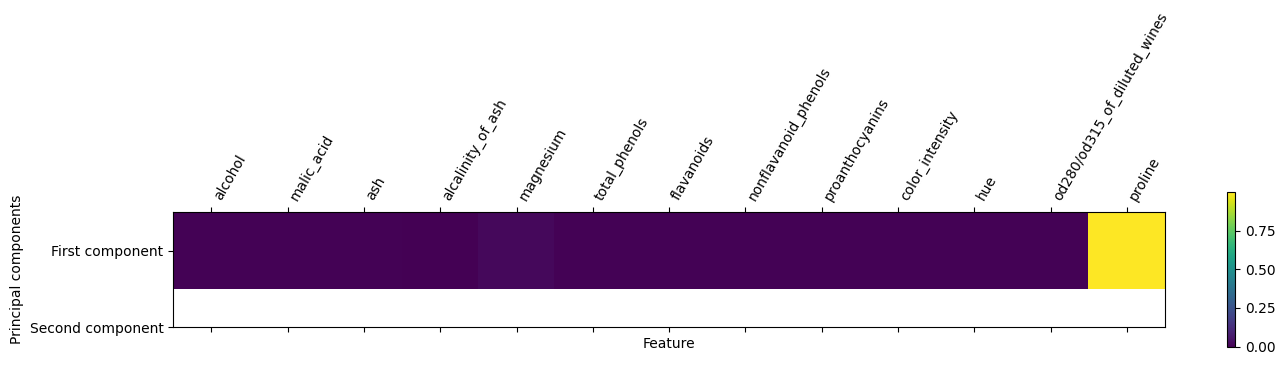

In [6]:
# plot the principal components
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(dataset.feature_names)),
           dataset.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [7]:
model2 = DecisionTreeClassifier(random_state=0).fit(X_train_pca, y_train)

print("Accuracy on training set: {:.2f}".format(model2.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.2f}".format(model2.score(X_test_pca, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.64


## Test with an SVM

In [8]:
from sklearn.svm import SVC

model3 = SVC().fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(model3.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model3.score(X_test, y_test)))

Accuracy on training set: 0.70
Accuracy on test set: 0.64


In [9]:
model4 = SVC().fit(X_train_pca, y_train)

print("Accuracy on training set: {:.2f}".format(model4.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.2f}".format(model4.score(X_test_pca, y_test)))

Accuracy on training set: 0.73
Accuracy on test set: 0.69


# Scale the Data

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

# PCA on Unscaled versus Scaled

Accuracy on training set: 0.73
Accuracy on test set: 0.72


Text(0, 0.5, 'Principal components')

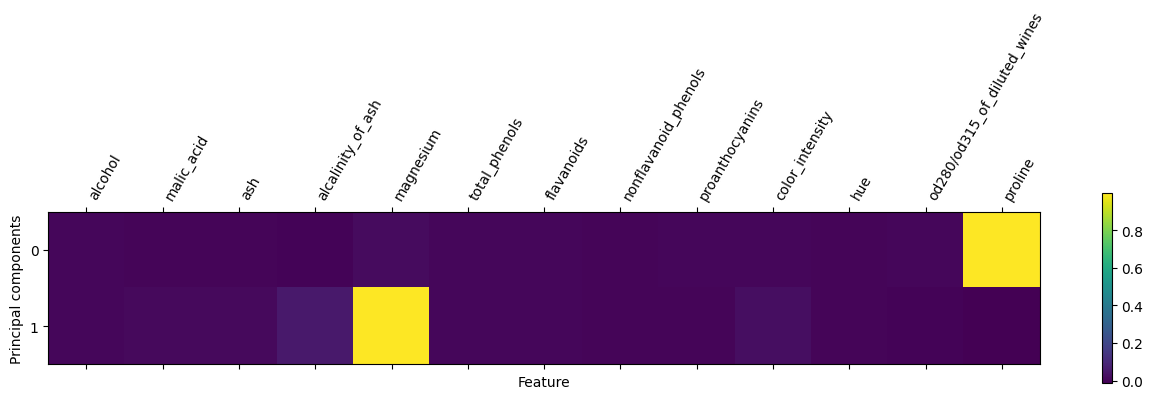

In [11]:
# keep the first two principal components of the data
pca2 = PCA(n_components=2)

# fit PCA model to training data
# transform data onto the first two principal components
X_train_pca2 = pca2.fit_transform(X_train)
X_test_pca2 = pca2.transform(X_test)

# test on SVM
model5 = SVC().fit(X_train_pca2, y_train)

print("Accuracy on training set: {:.2f}".format(model5.score(X_train_pca2, y_train)))
print("Accuracy on test set: {:.2f}".format(model5.score(X_test_pca2, y_test)))

plt.matshow(pca2.components_, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(dataset.feature_names)),
           dataset.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Accuracy on training set: 0.27
Accuracy on test set: 0.28


Text(0, 0.5, 'Principal components')

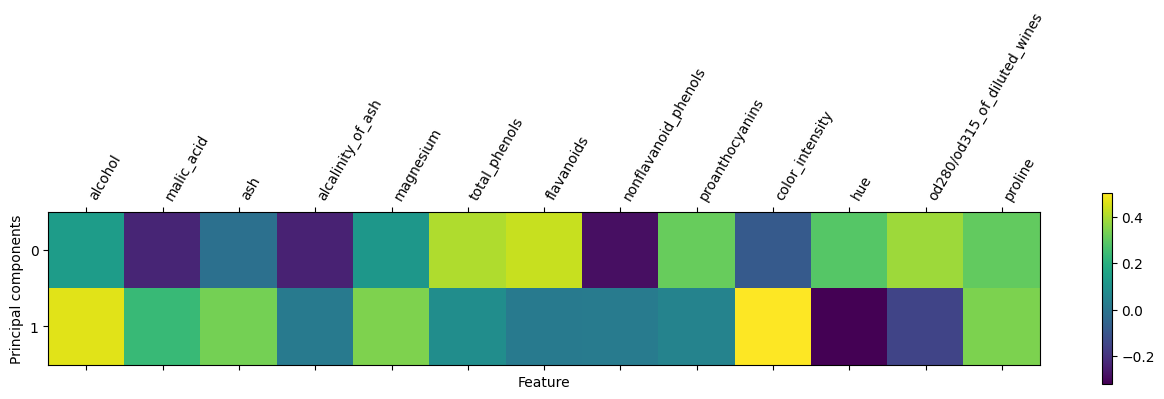

In [12]:
# keep the first two principal components of the data
pca3 = PCA(n_components=2)

# fit PCA model to training data
# transform data onto the first two principal components
X_train_pca3 = pca3.fit_transform(X_scaled_train)
X_test_pca3 = pca3.transform(X_scaled_test)

# test on SVM
model6 = SVC().fit(X_train_pca3, y_train)

print("Accuracy on training set: {:.2f}".format(model5.score(X_train_pca3, y_train)))
print("Accuracy on test set: {:.2f}".format(model5.score(X_test_pca3, y_test)))

plt.matshow(pca3.components_, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(dataset.feature_names)),
           dataset.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### 95% of Variance

Text(0, 0.5, 'Principal components')

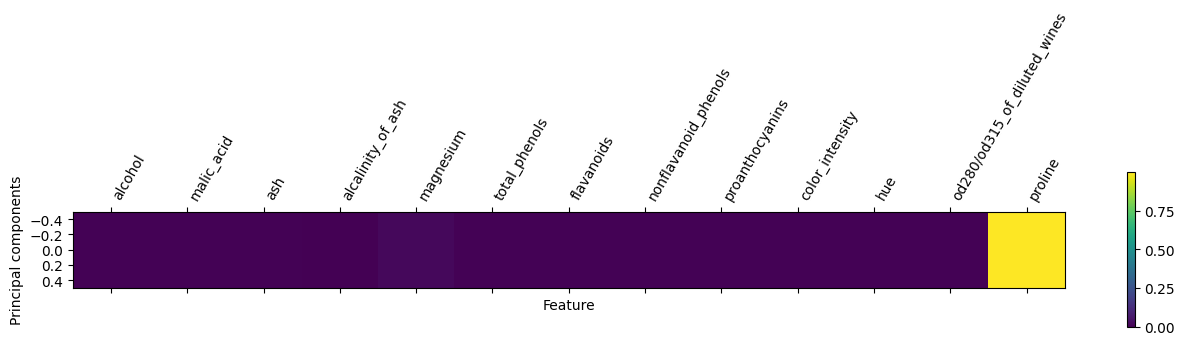

In [13]:
# 95% of the variance
pca4 = PCA(n_components=0.95)

# fit PCA model to training data
# transform data onto the first two principal components
X_train_pca4 = pca4.fit_transform(X_train)
X_test_pca4 = pca4.transform(X_test)

plt.matshow(pca4.components_, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(dataset.feature_names)),
           dataset.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Text(0, 0.5, 'Principal components')

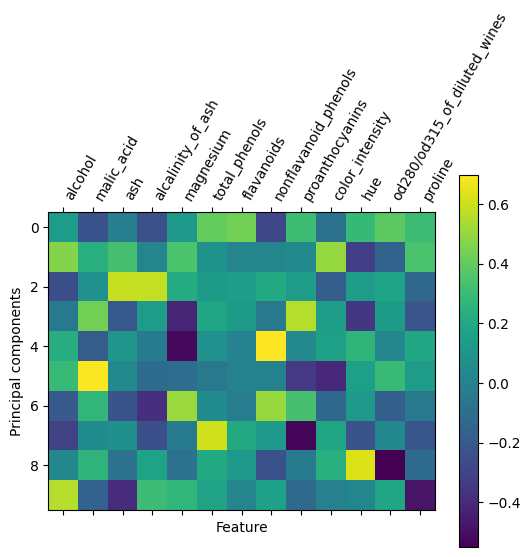

In [14]:
# 95% of the variance
pca5 = PCA(n_components=0.95)

# fit PCA model to training data
# transform data onto the first two principal components
X_train_pca5 = pca5.fit_transform(X_scaled_train)
X_test_pca5 = pca5.transform(X_scaled_test)

plt.matshow(pca5.components_, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(dataset.feature_names)),
           dataset.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

# NMF on Unscaled versus Scaled

Accuracy on training set: 0.69
Accuracy on test set: 0.58


/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'Principal components')

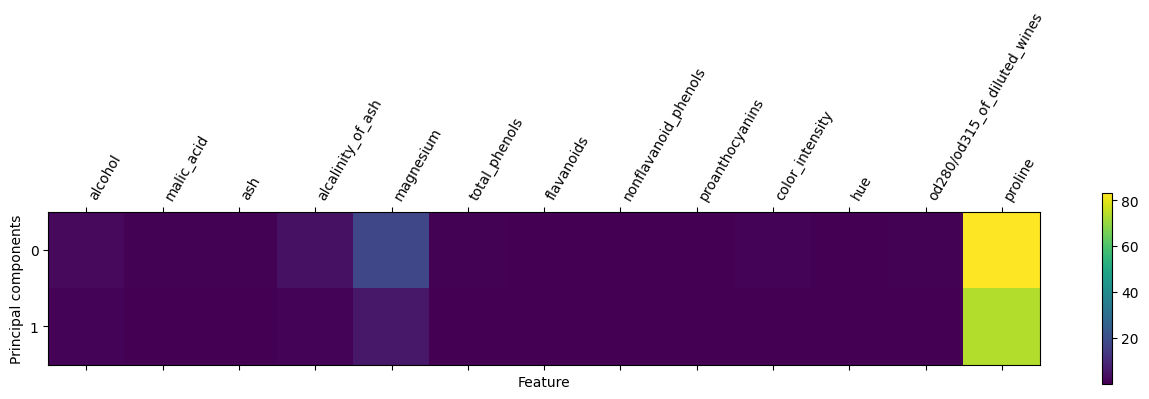

In [15]:
from sklearn.decomposition import NMF
# keep the first two components of the data
nmf1 = NMF(n_components=2, random_state=0)

# fit NMF model to data
# transform data onto the first two principal components
X_train_nmf1 = nmf1.fit_transform(abs(X_train))
X_test_nmf1 = nmf1.transform(abs(X_test))

# evaluate SVM performance
model7 = SVC().fit(X_train_nmf1, y_train)

print("Accuracy on training set: {:.2f}".format(model7.score(X_train_nmf1, y_train)))
print("Accuracy on test set: {:.2f}".format(model7.score(X_test_nmf1, y_test)))

plt.matshow(nmf1.components_, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(dataset.feature_names)),
           dataset.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Accuracy on training set: 0.40
Accuracy on test set: 0.58


Text(0, 0.5, 'Principal components')

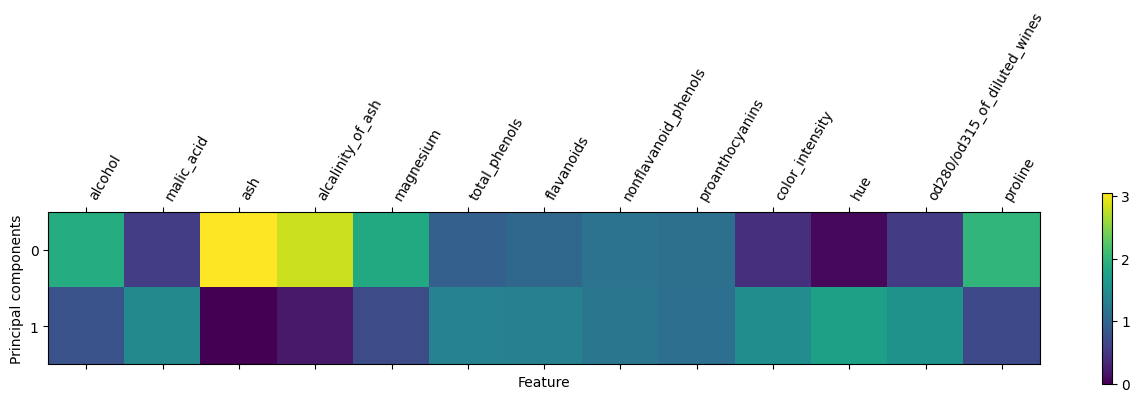

In [16]:
from sklearn.decomposition import NMF
# keep the first two components of the data
nmf2 = NMF(n_components=2, random_state=0)

# fit NMF model to data
# transform data onto the first two principal components
X_train_nmf2 = nmf2.fit_transform(abs(X_scaled_train))
X_test_nmf2 = nmf2.transform(abs(X_scaled_test))

# evaluate SVM performance
model8 = SVC().fit(X_train_nmf1, y_train)

print("Accuracy on training set: {:.2f}".format(model8.score(X_train_nmf2, y_train)))
print("Accuracy on test set: {:.2f}".format(model8.score(X_test_nmf1, y_test)))

plt.matshow(nmf2.components_, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(dataset.feature_names)),
           dataset.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

# TSN versus PCA

In [17]:
# install and load mglearn
! pip install mglearn
import mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 13.9 MB/s eta 0:00:00


Text(0, 0.5, 'Second principal component')

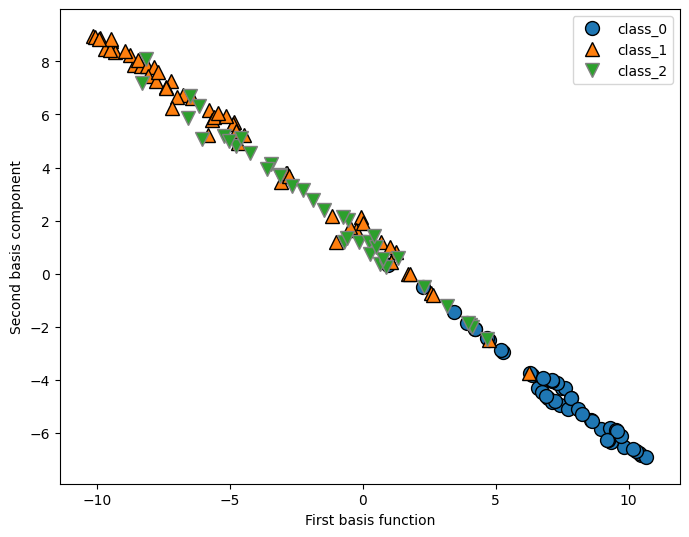

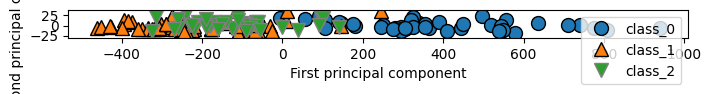

In [18]:
# unscaled

#tsne
# import TSNE
from sklearn.manifold import TSNE

# instantiate an instance of TSNE
tsne1 = TSNE(random_state=42)
X_tsne1 = tsne1.fit_transform(X_train)

# plot the first two dimensions
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_tsne1[:, 0], X_tsne1[:, 1], y_train)
plt.legend(dataset.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis function")
plt.ylabel("Second basis component")

# plot the first two dimensions of PCA
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_train_pca2 [:, 0], X_train_pca2 [:, 1], y_train)
plt.legend(dataset.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Second principal component')

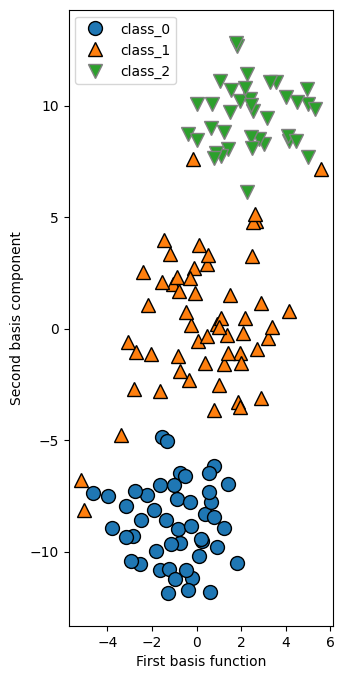

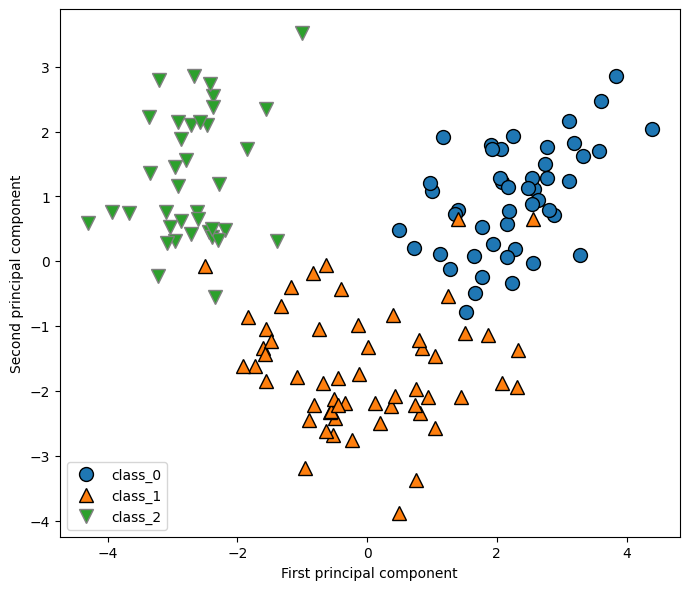

In [19]:
# scaled

#tsne
# instantiate an instance of TSNE
tsne2 = TSNE(random_state=42)
X_tsne2 = tsne2.fit_transform(X_scaled_train)

# plot the first two dimensions
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_tsne2[:, 0], X_tsne2[:, 1], y_train)
plt.legend(dataset.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis function")
plt.ylabel("Second basis component")

# plot the first two dimensions of PCA
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_train_pca3 [:, 0], X_train_pca3 [:, 1], y_train)
plt.legend(dataset.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")